# 🔌 Problem 1: Equivalent Resistance Using Graph Theory

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">📐 Visualizing Circuit Simplification Step-by-Step</h2>
</div>

---

## 🎯 Motivation

Calculating equivalent resistance is a fundamental task in circuit analysis. While series and parallel rules work well for simple circuits, **graph theory** provides a powerful, automated way to analyze **complex resistor networks**.

A circuit is modeled as a graph:
- **Nodes** represent junctions
- **Edges** represent resistors (with weights equal to resistance)

---

## 🧠 Approach

We reduce the graph step by step using:

1. 🔗 **Series Reduction**  
   Two resistors in a chain become one with total resistance:  
   $$ R_{\text{eq}} = R_1 + R_2 $$

2. 🔁 **Parallel Reduction**  
   Two or more resistors between the same nodes:  
   $$ \frac{1}{R_{\text{eq}}} = \frac{1}{R_1} + \frac{1}{R_2} + \cdots $$

3. 🔄 Repeat until the entire network reduces to a single equivalent resistance.

---

## 🧮 Example Circuit

A simple 4-node graph with resistors:

- 2Ω between nodes (1)-(2)  
- 3Ω between nodes (2)-(3)  
- 4Ω between nodes (3)-(4)  
- 1Ω directly between nodes (1)-(4)

---

## ⚙️ Algorithm Pseudocode

```plaintext
while graph not reduced:
    if a node has exactly 2 neighbors:
        combine series resistors
    if parallel resistors exist:
        combine using reciprocal rule


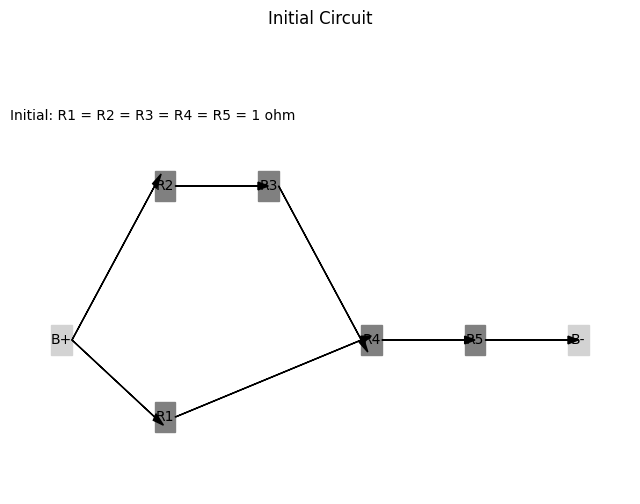

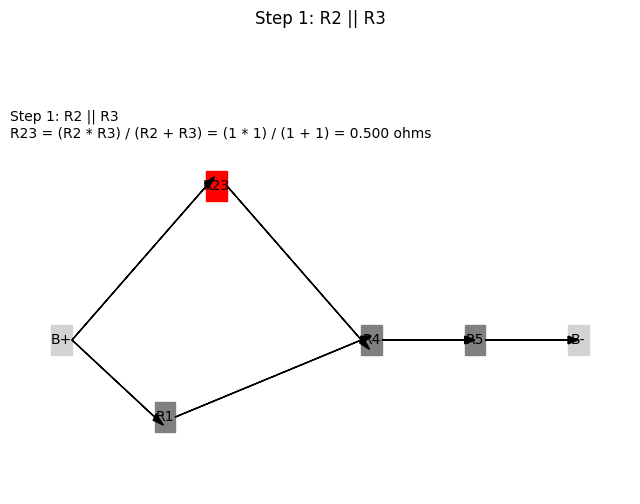

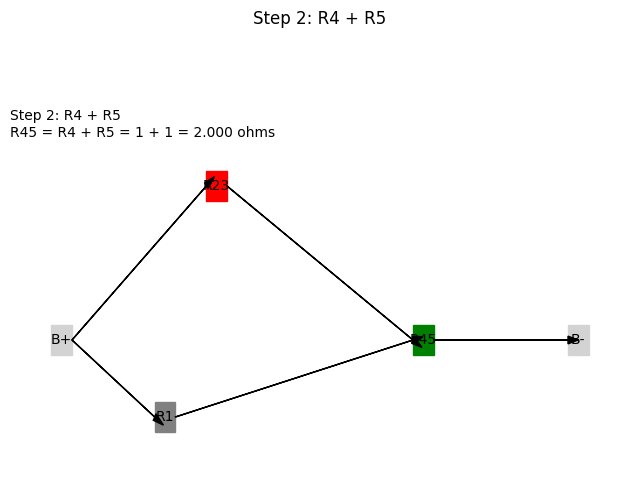

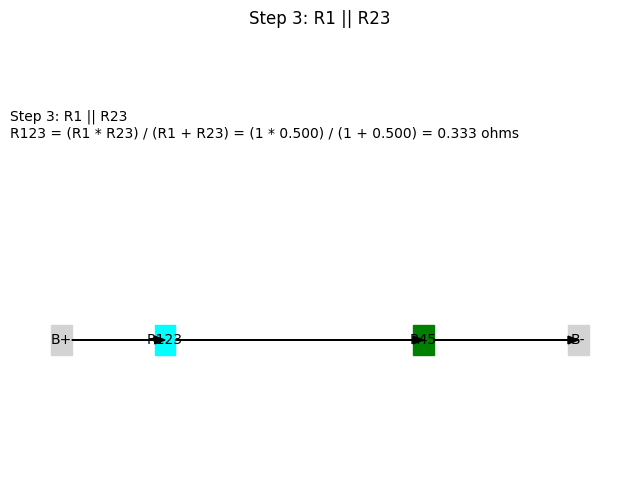

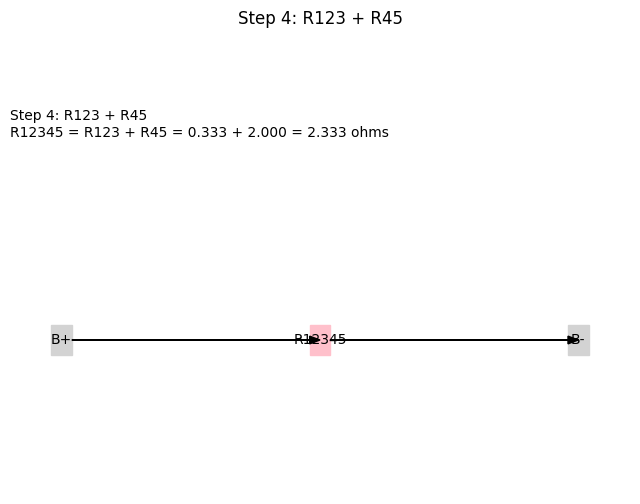

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Functions for calculations
def parallel_resistors(r1, r2):
    return (r1 * r2) / (r1 + r2)

def series_resistors(r1, r2):
    return r1 + r2

# Resistor values (all 1 ohm)
R1 = R2 = R3 = R4 = R5 = 1.0

# Calculate resistances
R23 = parallel_resistors(R2, R3)
R45 = series_resistors(R4, R5)
R123 = parallel_resistors(R1, R23)
R12345 = series_resistors(R123, R45)

# Function to draw a node (B+ or B-)
def draw_node(ax, x, y, label):
    ax.add_patch(patches.Rectangle((x-0.1, y-0.1), 0.2, 0.2, fill=True, color='lightgray'))
    ax.text(x, y, label, ha='center', va='center')

# Function to draw a resistor
def draw_resistor(ax, x, y, label, color='gray'):
    ax.add_patch(patches.Rectangle((x-0.1, y-0.1), 0.2, 0.2, fill=True, color=color))
    ax.text(x, y, label, ha='center', va='center')

# Function to draw a connection (line with arrow)
def draw_connection(ax, x1, y1, x2, y2):
    ax.arrow(x1, y1, x2-x1, y2-y1, head_width=0.05, head_length=0.1, fc='black', ec='black')

# Function to set up the plot
def setup_plot(title, calc_text=""):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(0, 6)
    ax.set_ylim(-1, 2)
    ax.set_title(title)
    ax.text(0, 1.5, calc_text, fontsize=10, verticalalignment='top')
    ax.axis('off')
    return ax

# Step 0: Initial circuit
calc_text = "Initial: R1 = R2 = R3 = R4 = R5 = 1 ohm"
ax = setup_plot("Initial Circuit", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 1.5, 1, 'R2')
draw_resistor(ax, 2.5, 1, 'R3')
draw_resistor(ax, 1.5, -0.5, 'R1')
draw_resistor(ax, 3.5, 0, 'R4')
draw_resistor(ax, 4.5, 0, 'R5')
draw_connection(ax, 0.6, 0, 1.4, 1)
draw_connection(ax, 1.6, 1, 2.4, 1)
draw_connection(ax, 2.6, 1, 3.4, 0)
draw_connection(ax, 0.6, 0, 1.4, -0.5)
draw_connection(ax, 1.6, -0.5, 3.4, 0)
draw_connection(ax, 3.6, 0, 4.4, 0)
draw_connection(ax, 4.6, 0, 5.4, 0)
plt.savefig('initial_circuit.png')

# Step 1: R2 and R3 combined (parallel)
calc_text = f"Step 1: R2 || R3\nR23 = (R2 * R3) / (R2 + R3) = (1 * 1) / (1 + 1) = {R23:.3f} ohms"
ax = setup_plot("Step 1: R2 || R3", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 2.0, 1, 'R23', color='red')
draw_resistor(ax, 1.5, -0.5, 'R1')
draw_resistor(ax, 3.5, 0, 'R4')
draw_resistor(ax, 4.5, 0, 'R5')
draw_connection(ax, 0.6, 0, 1.9, 1)
draw_connection(ax, 2.1, 1, 3.4, 0)
draw_connection(ax, 0.6, 0, 1.4, -0.5)
draw_connection(ax, 1.6, -0.5, 3.4, 0)
draw_connection(ax, 3.6, 0, 4.4, 0)
draw_connection(ax, 4.6, 0, 5.4, 0)
plt.savefig('step1_circuit.png')

# Step 2: R4 and R5 combined (series)
calc_text = f"Step 2: R4 + R5\nR45 = R4 + R5 = 1 + 1 = {R45:.3f} ohms"
ax = setup_plot("Step 2: R4 + R5", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 2.0, 1, 'R23', color='red')
draw_resistor(ax, 1.5, -0.5, 'R1')
draw_resistor(ax, 4.0, 0, 'R45', color='green')
draw_connection(ax, 0.6, 0, 1.9, 1)
draw_connection(ax, 2.1, 1, 3.9, 0)
draw_connection(ax, 0.6, 0, 1.4, -0.5)
draw_connection(ax, 1.6, -0.5, 3.9, 0)
draw_connection(ax, 4.1, 0, 5.4, 0)
plt.savefig('step2_circuit.png')

# Step 3: R1 and R23 combined (parallel)
calc_text = f"Step 3: R1 || R23\nR123 = (R1 * R23) / (R1 + R23) = (1 * {R23:.3f}) / (1 + {R23:.3f}) = {R123:.3f} ohms"
ax = setup_plot("Step 3: R1 || R23", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 1.5, 0, 'R123', color='cyan')
draw_resistor(ax, 4.0, 0, 'R45', color='green')
draw_connection(ax, 0.6, 0, 1.4, 0)
draw_connection(ax, 1.6, 0, 3.9, 0)
draw_connection(ax, 4.1, 0, 5.4, 0)
plt.savefig('step3_circuit.png')

# Step 4: R123 and R45 combined (series)
calc_text = f"Step 4: R123 + R45\nR12345 = R123 + R45 = {R123:.3f} + {R45:.3f} = {R12345:.3f} ohms"
ax = setup_plot("Step 4: R123 + R45", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 3.0, 0, 'R12345', color='pink')
draw_connection(ax, 0.6, 0, 2.9, 0)
draw_connection(ax, 3.1, 0, 5.4, 0)
plt.savefig('step4_circuit.png')

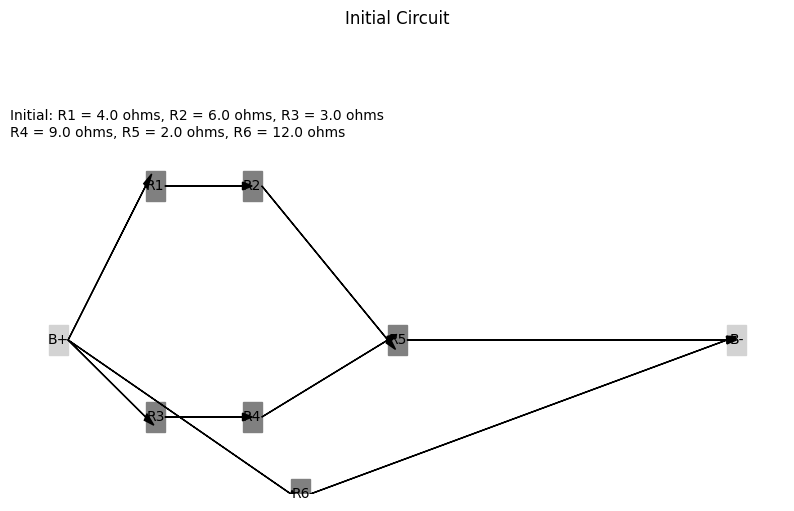

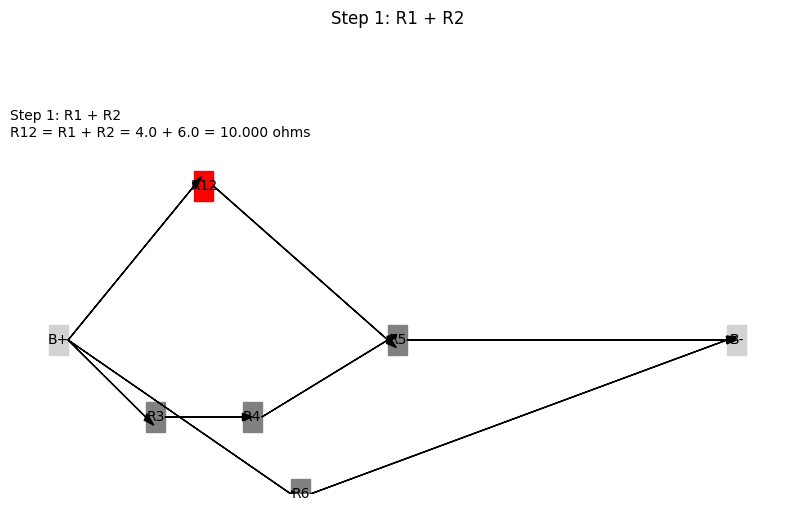

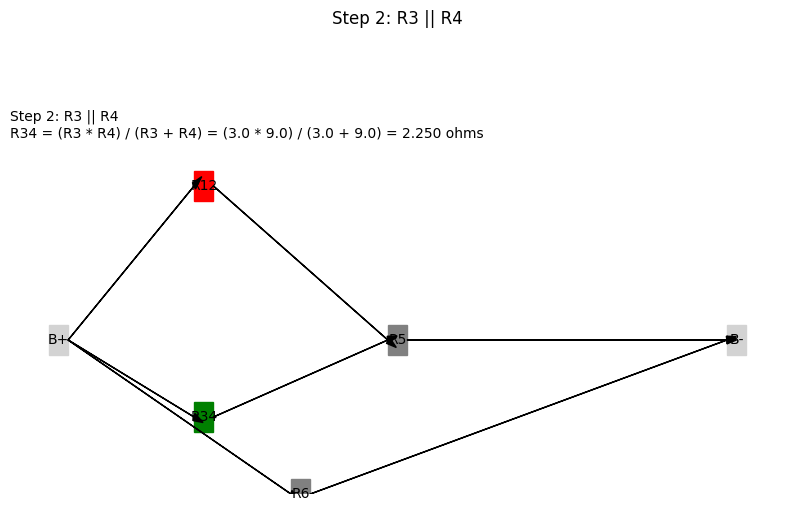

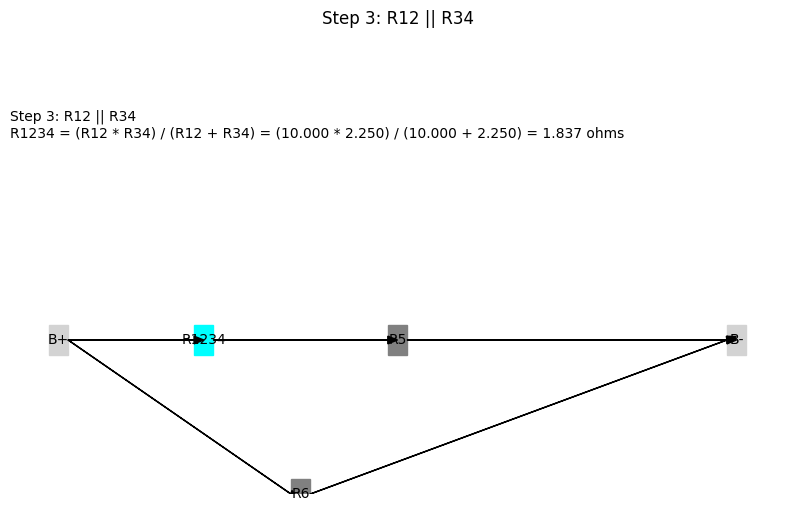

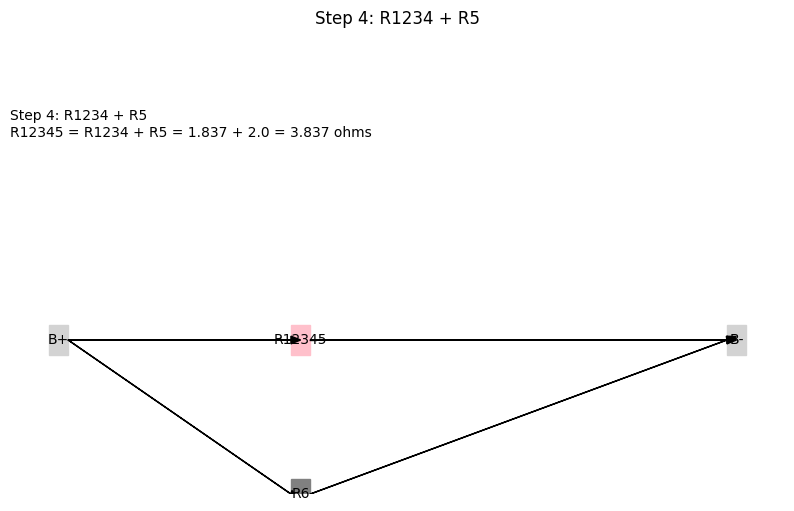

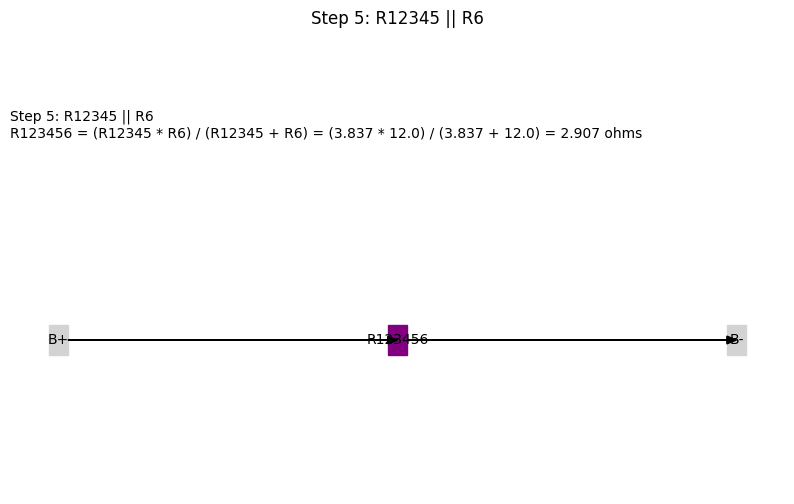

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Functions for calculations
def parallel_resistors(r1, r2):
    return (r1 * r2) / (r1 + r2)

def series_resistors(r1, r2):
    return r1 + r2

# Resistor values
R1 = 4.0
R2 = 6.0
R3 = 3.0
R4 = 9.0
R5 = 2.0
R6 = 12.0

# Calculate resistances
R12 = series_resistors(R1, R2)
R34 = parallel_resistors(R3, R4)
R1234 = parallel_resistors(R12, R34)
R12345 = series_resistors(R1234, R5)
R123456 = parallel_resistors(R12345, R6)

# Function to draw a node (B+ or B-)
def draw_node(ax, x, y, label):
    ax.add_patch(patches.Rectangle((x-0.1, y-0.1), 0.2, 0.2, fill=True, color='lightgray'))
    ax.text(x, y, label, ha='center', va='center')

# Function to draw a resistor
def draw_resistor(ax, x, y, label, color='gray'):
    ax.add_patch(patches.Rectangle((x-0.1, y-0.1), 0.2, 0.2, fill=True, color=color))
    ax.text(x, y, label, ha='center', va='center')

# Function to draw a connection (line with arrow)
def draw_connection(ax, x1, y1, x2, y2):
    ax.arrow(x1, y1, x2-x1, y2-y1, head_width=0.05, head_length=0.1, fc='black', ec='black')

# Function to set up the plot
def setup_plot(title, calc_text=""):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 8)
    ax.set_ylim(-1, 2)
    ax.set_title(title)
    ax.text(0, 1.5, calc_text, fontsize=10, verticalalignment='top')
    ax.axis('off')
    return ax

# Step 0: Initial circuit
calc_text = f"Initial: R1 = {R1} ohms, R2 = {R2} ohms, R3 = {R3} ohms\nR4 = {R4} ohms, R5 = {R5} ohms, R6 = {R6} ohms"
ax = setup_plot("Initial Circuit", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 7.5, 0, 'B-')
draw_resistor(ax, 1.5, 1, 'R1')
draw_resistor(ax, 2.5, 1, 'R2')
draw_resistor(ax, 1.5, -0.5, 'R3')
draw_resistor(ax, 2.5, -0.5, 'R4')
draw_resistor(ax, 4.0, 0, 'R5')
draw_resistor(ax, 3.0, -1, 'R6')
draw_connection(ax, 0.6, 0, 1.4, 1)
draw_connection(ax, 1.6, 1, 2.4, 1)
draw_connection(ax, 2.6, 1, 3.9, 0)
draw_connection(ax, 0.6, 0, 1.4, -0.5)
draw_connection(ax, 1.6, -0.5, 2.4, -0.5)
draw_connection(ax, 2.6, -0.5, 3.9, 0)
draw_connection(ax, 4.1, 0, 7.4, 0)
draw_connection(ax, 0.6, 0, 2.9, -1)
draw_connection(ax, 3.1, -1, 7.4, 0)
plt.savefig('initial_circuit.png')

# Step 1: R1 and R2 combined (series)
calc_text = f"Step 1: R1 + R2\nR12 = R1 + R2 = {R1} + {R2} = {R12:.3f} ohms"
ax = setup_plot("Step 1: R1 + R2", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 7.5, 0, 'B-')
draw_resistor(ax, 2.0, 1, 'R12', color='red')
draw_resistor(ax, 1.5, -0.5, 'R3')
draw_resistor(ax, 2.5, -0.5, 'R4')
draw_resistor(ax, 4.0, 0, 'R5')
draw_resistor(ax, 3.0, -1, 'R6')
draw_connection(ax, 0.6, 0, 1.9, 1)
draw_connection(ax, 2.1, 1, 3.9, 0)
draw_connection(ax, 0.6, 0, 1.4, -0.5)
draw_connection(ax, 1.6, -0.5, 2.4, -0.5)
draw_connection(ax, 2.6, -0.5, 3.9, 0)
draw_connection(ax, 4.1, 0, 7.4, 0)
draw_connection(ax, 0.6, 0, 2.9, -1)
draw_connection(ax, 3.1, -1, 7.4, 0)
plt.savefig('step1_circuit.png')

# Step 2: R3 and R4 combined (parallel)
calc_text = f"Step 2: R3 || R4\nR34 = (R3 * R4) / (R3 + R4) = ({R3} * {R4}) / ({R3} + {R4}) = {R34:.3f} ohms"
ax = setup_plot("Step 2: R3 || R4", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 7.5, 0, 'B-')
draw_resistor(ax, 2.0, 1, 'R12', color='red')
draw_resistor(ax, 2.0, -0.5, 'R34', color='green')
draw_resistor(ax, 4.0, 0, 'R5')
draw_resistor(ax, 3.0, -1, 'R6')
draw_connection(ax, 0.6, 0, 1.9, 1)
draw_connection(ax, 2.1, 1, 3.9, 0)
draw_connection(ax, 0.6, 0, 1.9, -0.5)
draw_connection(ax, 2.1, -0.5, 3.9, 0)
draw_connection(ax, 4.1, 0, 7.4, 0)
draw_connection(ax, 0.6, 0, 2.9, -1)
draw_connection(ax, 3.1, -1, 7.4, 0)
plt.savefig('step2_circuit.png')

# Step 3: R12 and R34 combined (parallel)
calc_text = f"Step 3: R12 || R34\nR1234 = (R12 * R34) / (R12 + R34) = ({R12:.3f} * {R34:.3f}) / ({R12:.3f} + {R34:.3f}) = {R1234:.3f} ohms"
ax = setup_plot("Step 3: R12 || R34", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 7.5, 0, 'B-')
draw_resistor(ax, 2.0, 0, 'R1234', color='cyan')
draw_resistor(ax, 4.0, 0, 'R5')
draw_resistor(ax, 3.0, -1, 'R6')
draw_connection(ax, 0.6, 0, 1.9, 0)
draw_connection(ax, 2.1, 0, 3.9, 0)
draw_connection(ax, 4.1, 0, 7.4, 0)
draw_connection(ax, 0.6, 0, 2.9, -1)
draw_connection(ax, 3.1, -1, 7.4, 0)
plt.savefig('step3_circuit.png')

# Step 4: R1234 and R5 combined (series)
calc_text = f"Step 4: R1234 + R5\nR12345 = R1234 + R5 = {R1234:.3f} + {R5} = {R12345:.3f} ohms"
ax = setup_plot("Step 4: R1234 + R5", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 7.5, 0, 'B-')
draw_resistor(ax, 3.0, 0, 'R12345', color='pink')
draw_resistor(ax, 3.0, -1, 'R6')
draw_connection(ax, 0.6, 0, 2.9, 0)
draw_connection(ax, 3.1, 0, 7.4, 0)
draw_connection(ax, 0.6, 0, 2.9, -1)
draw_connection(ax, 3.1, -1, 7.4, 0)
plt.savefig('step4_circuit.png')

# Step 5: R12345 and R6 combined (parallel)
calc_text = f"Step 5: R12345 || R6\nR123456 = (R12345 * R6) / (R12345 + R6) = ({R12345:.3f} * {R6}) / ({R12345:.3f} + {R6}) = {R123456:.3f} ohms"
ax = setup_plot("Step 5: R12345 || R6", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 7.5, 0, 'B-')
draw_resistor(ax, 4.0, 0, 'R123456', color='purple')
draw_connection(ax, 0.6, 0, 3.9, 0)
draw_connection(ax, 4.1, 0, 7.4, 0)
plt.savefig('step5_circuit.png')

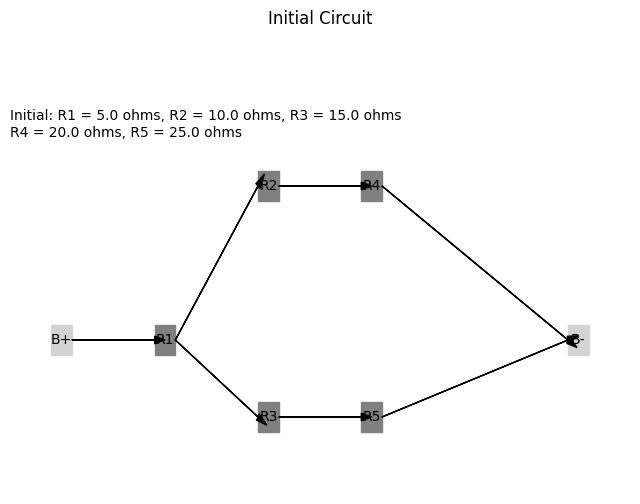

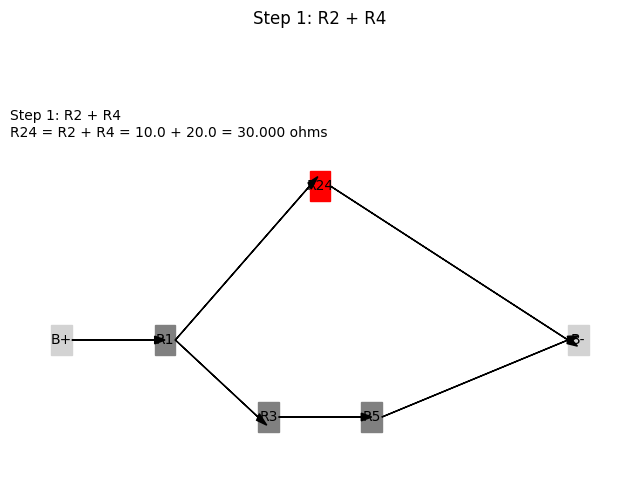

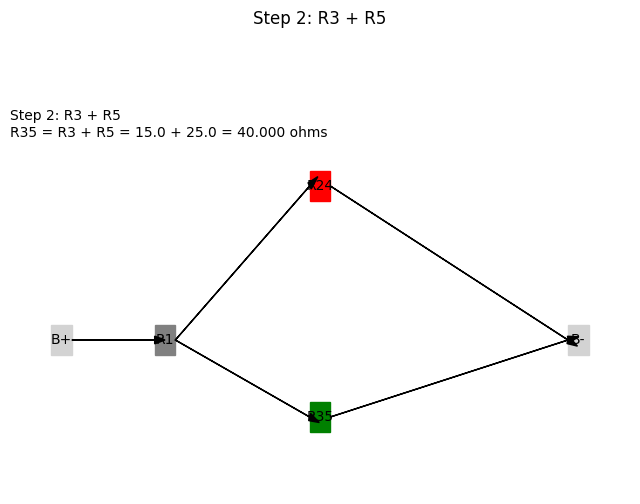

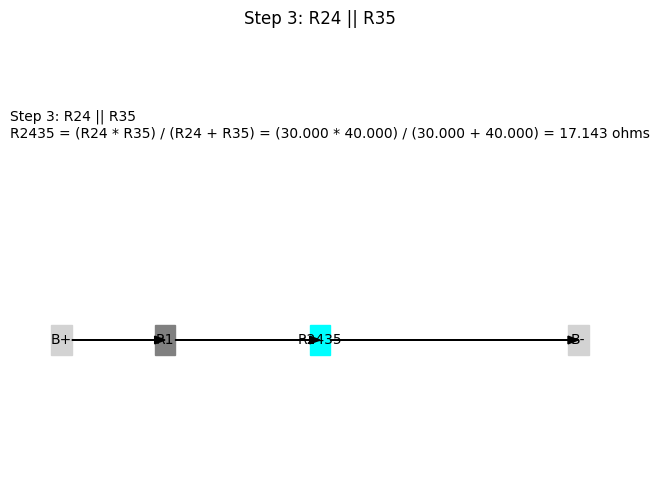

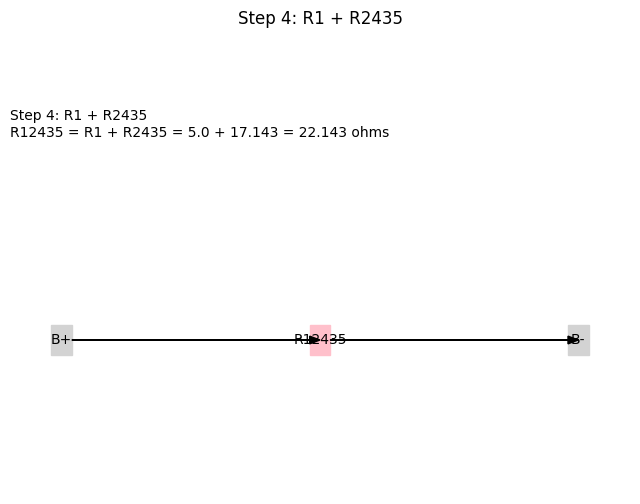

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Functions for calculations
def parallel_resistors(r1, r2):
    return (r1 * r2) / (r1 + r2)

def series_resistors(r1, r2):
    return r1 + r2

# Resistor values
R1 = 5.0
R2 = 10.0
R3 = 15.0
R4 = 20.0
R5 = 25.0

# Calculate resistances
R24 = series_resistors(R2, R4)
R35 = series_resistors(R3, R5)
R2435 = parallel_resistors(R24, R35)
R12435 = series_resistors(R1, R2435)

# Function to draw a node (B+ or B-)
def draw_node(ax, x, y, label):
    ax.add_patch(patches.Rectangle((x-0.1, y-0.1), 0.2, 0.2, fill=True, color='lightgray'))
    ax.text(x, y, label, ha='center', va='center')

# Function to draw a resistor (as a node)
def draw_resistor(ax, x, y, label, color='gray'):
    ax.add_patch(patches.Rectangle((x-0.1, y-0.1), 0.2, 0.2, fill=True, color=color))
    ax.text(x, y, label, ha='center', va='center')

# Function to draw a connection (line with arrow)
def draw_connection(ax, x1, y1, x2, y2):
    ax.arrow(x1, y1, x2-x1, y2-y1, head_width=0.05, head_length=0.1, fc='black', ec='black')

# Function to set up the plot
def setup_plot(title, calc_text=""):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(0, 6)
    ax.set_ylim(-1, 2)
    ax.set_title(title)
    ax.text(0, 1.5, calc_text, fontsize=10, verticalalignment='top')
    ax.axis('off')
    return ax

# Step 0: Initial circuit (simplified representation)
calc_text = f"Initial: R1 = {R1} ohms, R2 = {R2} ohms, R3 = {R3} ohms\nR4 = {R4} ohms, R5 = {R5} ohms"
ax = setup_plot("Initial Circuit", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 1.5, 0, 'R1')
draw_resistor(ax, 2.5, 1, 'R2')
draw_resistor(ax, 2.5, -0.5, 'R3')
draw_resistor(ax, 3.5, 1, 'R4')
draw_resistor(ax, 3.5, -0.5, 'R5')
draw_connection(ax, 0.6, 0, 1.4, 0)
draw_connection(ax, 1.6, 0, 2.4, 1)
draw_connection(ax, 1.6, 0, 2.4, -0.5)
draw_connection(ax, 2.6, 1, 3.4, 1)
draw_connection(ax, 2.6, -0.5, 3.4, -0.5)
draw_connection(ax, 3.6, 1, 5.4, 0)
draw_connection(ax, 3.6, -0.5, 5.4, 0)
plt.savefig('initial_circuit.png')

# Step 1: R2 and R4 combined (series)
calc_text = f"Step 1: R2 + R4\nR24 = R2 + R4 = {R2} + {R4} = {R24:.3f} ohms"
ax = setup_plot("Step 1: R2 + R4", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 1.5, 0, 'R1')
draw_resistor(ax, 3.0, 1, 'R24', color='red')
draw_resistor(ax, 2.5, -0.5, 'R3')
draw_resistor(ax, 3.5, -0.5, 'R5')
draw_connection(ax, 0.6, 0, 1.4, 0)
draw_connection(ax, 1.6, 0, 2.9, 1)
draw_connection(ax, 1.6, 0, 2.4, -0.5)
draw_connection(ax, 3.1, 1, 5.4, 0)
draw_connection(ax, 2.6, -0.5, 3.4, -0.5)
draw_connection(ax, 3.6, -0.5, 5.4, 0)
plt.savefig('step1_circuit.png')

# Step 2: R3 and R5 combined (series)
calc_text = f"Step 2: R3 + R5\nR35 = R3 + R5 = {R3} + {R5} = {R35:.3f} ohms"
ax = setup_plot("Step 2: R3 + R5", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 1.5, 0, 'R1')
draw_resistor(ax, 3.0, 1, 'R24', color='red')
draw_resistor(ax, 3.0, -0.5, 'R35', color='green')
draw_connection(ax, 0.6, 0, 1.4, 0)
draw_connection(ax, 1.6, 0, 2.9, 1)
draw_connection(ax, 1.6, 0, 2.9, -0.5)
draw_connection(ax, 3.1, 1, 5.4, 0)
draw_connection(ax, 3.1, -0.5, 5.4, 0)
plt.savefig('step2_circuit.png')

# Step 3: R24 and R35 combined (parallel)
calc_text = f"Step 3: R24 || R35\nR2435 = (R24 * R35) / (R24 + R35) = ({R24:.3f} * {R35:.3f}) / ({R24:.3f} + {R35:.3f}) = {R2435:.3f} ohms"
ax = setup_plot("Step 3: R24 || R35", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 1.5, 0, 'R1')
draw_resistor(ax, 3.0, 0, 'R2435', color='cyan')
draw_connection(ax, 0.6, 0, 1.4, 0)
draw_connection(ax, 1.6, 0, 2.9, 0)
draw_connection(ax, 3.1, 0, 5.4, 0)
plt.savefig('step3_circuit.png')

# Step 4: R1 and R2435 combined (series)
calc_text = f"Step 4: R1 + R2435\nR12435 = R1 + R2435 = {R1} + {R2435:.3f} = {R12435:.3f} ohms"
ax = setup_plot("Step 4: R1 + R2435", calc_text)
draw_node(ax, 0.5, 0, 'B+')
draw_node(ax, 5.5, 0, 'B-')
draw_resistor(ax, 3.0, 0, 'R12435', color='pink')
draw_connection(ax, 0.6, 0, 2.9, 0)
draw_connection(ax, 3.1, 0, 5.4, 0)
plt.savefig('step4_circuit.png')